<a href="https://colab.research.google.com/github/Yamile222768/Tareas/blob/main/Tarea_10_CD_Yamile_M%C3%A1rquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TAREA ACTIVIDAD 10 - ESTADÍSTICA DESCRIPTIVA CON PYTHON**

*Eres un analista de datos en una empresa de comercio electrónico y se te ha proporcionado un archivo CSV llamado "datos_ventas.csy" que contiene datos de ventas de diferentes productos. Tu objetivo es realizar un análisis más completo y detallado de las ventas.*

***a) Cargar los datos desde el archivo CSV y almacenarlos en un DataFrame llamado ventas.***


In [8]:
#Libreria
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
ventas = pd.read_csv('/content/datos_ventas - Copy.csv')
ventas.head()

,Producto,Categoria,Fecha,Cantidad,Precio
0,Producto B,Categoria 1,2023-02-05,16,37.00
1,Producto A,Categoria 2,2022-08-24,5,30.24
2,Producto A,Categoria 2,2023-05-07,3,23.29
3,Producto C,Categoria 1,2023-01-07,13,28.30
4,Producto A,Categoria 1,2023-05-31,10,34.89


***b) Calcular y mostrar el resumen estadístico completo del DataFrame, incluyendo medidas de tendencia central, dispersión y forma.***


In [5]:
# Medidas de tendencia central: media (mean), mediana (50%).
# Medidas de dispersión: desviación estándar (std), rango (min, max).
# Medidas de forma: percentiles (25%, 50%, 75%).
resumen_estadistico = ventas.describe(include='all')
resumen_estadistico

,Producto,Categoria,Fecha,Cantidad,Precio
count,100,100,100,100.000000,100.000000
unique,3,2,93,NaN,NaN
top,Producto A,Categoria 2,2022-12-31,NaN,NaN
freq,38,54,2,NaN,NaN
mean,NaN,NaN,NaN,9.570000,28.888100
std,NaN,NaN,NaN,5.876258,11.189085
min,NaN,NaN,NaN,1.000000,10.660000
25%,NaN,NaN,NaN,5.000000,19.747500
50%,NaN,NaN,NaN,9.000000,27.250000
75%,NaN,NaN,NaN,15.000000,36.842500


***c) Realizar un análisis por categoría de productos. Para cada categoría, calcular y mostrar:***

i. La cantidad total de productos vendidos.

ii. El precio promedio de venta.

iii. La cantidad máxima y mínima de productos vendidos.

iv. El rango intercuartil (IQR) de los precios'.


In [7]:
# Agrupar por 'Categoria'
analisis_categoria = ventas.groupby('Categoria').agg(
    # i. Cantidad total de productos vendidos
    cantidad_total_vendida=('Cantidad', 'sum'),

    # ii. Precio promedio de venta
    precio_promedio=('Precio', 'mean'),

    # iii. Cantidad máxima y mínima de productos vendidos
    cantidad_maxima=('Cantidad', 'max'),
    cantidad_minima=('Cantidad', 'min'),

    # iv. Rango intercuartil de los precios
    iqr_precio=('Precio', lambda x: x.quantile(0.75) - x.quantile(0.25))
).reset_index()

analisis_categoria

,Categoria,cantidad_total_vendida,precio_promedio,cantidad_maxima,cantidad_minima,iqr_precio
0,Categoria 1,462,28.524783,20,1,18.110
1,Categoria 2,495,29.197593,20,1,14.645


***d) Calcular y mostrar la matriz de correlación entre las columnas "cantidad" y "precio", así como también visualizarla mediante un mapa de calor'.***

In [11]:
# Calcular la matriz de correlación entre 'Cantidad' y 'Precio'
matriz_correlacion = ventas[['Cantidad', 'Precio']].corr()
matriz_correlacion

,Cantidad,Precio
Cantidad,1.000000,0.018435
Precio,0.018435,1.000000


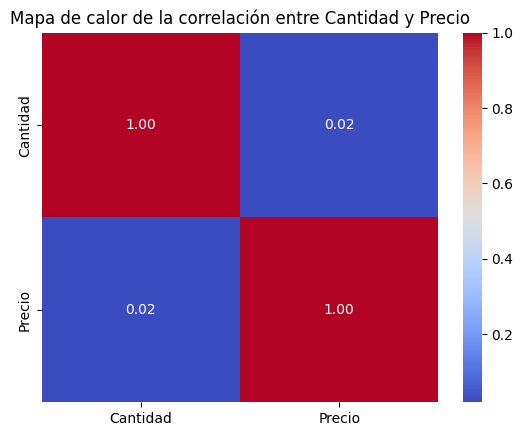

In [12]:
# Visualizar la matriz de correlación con un mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

# Mostrar el mapa de calor
plt.title('Mapa de calor de la correlación entre Cantidad y Precio')
plt.show()

***e) Identificar los productos con ventas atípicas (outliers) en función de la cantidad vendida. Mostrar los nombres de los productos y las cantidades correspondientes.***


Text(0.5, 1.0, 'Distribución de la cantidad vendida')

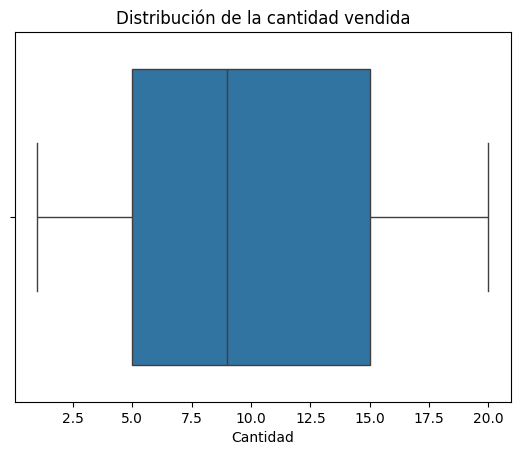

In [19]:
# Crear un gráfico de caja (boxplot) para ver la distribución de 'Cantidad'
sns.boxplot(x=ventas['Cantidad'])
plt.title('Distribución de la cantidad vendida')

In [30]:
 # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
 Q1 = ventas.select_dtypes(include=['number']).quantile(0.25)
 Q3 = ventas.select_dtypes(include=['number']).quantile(0.75)
 IQR = Q3 - Q1
 print(IQR)

Cantidad    10.000
Precio      17.095
dtype: float64


In [32]:
 # Align the Series with the DataFrame's columns
Q1 = Q1.reindex(ventas.columns)
Q3 = Q3.reindex(ventas.columns)
IQR = IQR.reindex(ventas.columns)
ventas = ventas[~((ventas < (Q1 - 1.5 * IQR)) |(ventas > (Q3 + 1.5 * IQR))).any(axis=1)]
ventas.shape

(100, 5)

In [29]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = ventas['Cantidad'].quantile(0.25)
Q3 = ventas['Cantidad'].quantile(0.75)
IQR = Q3 - Q1 #rango intercuartil (IQR)

# Calcular los límites para identificar outliers
limite_inferior = Q1 - 1.0 * IQR
limite_superior = Q3 + 1.50 * IQR

# Filtrar productos con ventas atípicas (outliers)
outliers = ventas[(ventas['Cantidad'] < limite_inferior) | (ventas['Cantidad'] > limite_superior)]

# Mostrar los nombres de los productos y las cantidades correspondientes
print(outliers[['Producto', 'Cantidad']])


Empty DataFrame
Columns: [Producto, Cantidad]
Index: []


***f) Calcular y mostrar el porcentaje de ventas acumuladas por categoría. Ordenar las categorías de mayor a menor por su porcentaje de ventas acumuladas.***


In [33]:
# Calcular las ventas totales por categoría
ventas_por_categoria = ventas.groupby('Categoria')['Cantidad'].sum()

# Calcular el porcentaje de ventas por categoría
ventas_por_categoria_pct = (ventas_por_categoria / ventas_por_categoria.sum()) * 100

# Ordenar las categorías de mayor a menor porcentaje de ventas
ventas_por_categoria_pct_ordenado = ventas_por_categoria_pct.sort_values(ascending=False)
ventas_por_categoria_pct_ordenado

,Cantidad
Categoria,
Categoria 2,51.724138
Categoria 1,48.275862


***g) Realizar un análisis temporal de las ventas. Agrupar las ventas por mes y mostrar:***

i. La cantidad total de productos vendidos en cada mes.

ii. El precio promedio de venta en cada mes.

iii. El mes con el mayor y menor monto total de ventas.
Exportar los resultados obtenidos en los pasos 3, 4, 5, 6 y 7 a un nuevo archivo CSV llamado "resultados_ventas.cs".


In [42]:
# Asegurarse de que la columna 'Fecha' esté en formato de fecha
ventas['Fecha'] = pd.to_datetime(ventas['Fecha'])

# Extraer el mes de la columna 'Fecha'
ventas['Mes'] = ventas['Fecha'].dt.month

# Agrupar por mes y calcular la cantidad total vendida y el precio promedio
analisis_mensual = ventas.groupby('Mes').agg(
    cantidad_total_vendida=('Cantidad', 'sum'),  # i. Cantidad total de productos vendidos en cada mes
    precio_promedio=('Precio', 'mean')           # ii. Precio promedio de venta en cada mes
).reset_index()

# Calcular el monto total de ventas (Cantidad * Precio) para cada mes
ventas['Monto_Venta'] = ventas['Cantidad'] * ventas['Precio']
monto_por_mes = ventas.groupby('Mes')['Monto_Venta'].sum()

# Agregar la columna 'Monto_Venta' al DataFrame de análisis mensual
analisis_mensual['Monto_Venta'] = monto_por_mes.values

# iii. Encontrar el mes con el mayor y menor monto total de ventas
mes_max_ventas = analisis_mensual.loc[analisis_mensual['Monto_Venta'].idxmax()]['Mes']
mes_min_ventas = analisis_mensual.loc[analisis_mensual['Monto_Venta'].idxmin()]['Mes']

analisis_mensual

,Mes,cantidad_total_vendida,precio_promedio,Monto_Venta
0,1,147,33.699231,4515.86
1,2,92,28.065556,2405.30
2,3,92,28.308000,2863.79
3,4,40,29.124000,1216.38
4,5,53,26.615000,1417.75
5,6,89,30.208750,2744.19
6,7,47,33.032000,1603.22
7,8,63,32.165000,1934.46
8,9,31,26.011667,742.63
9,10,91,33.404286,2865.93


In [44]:
# Mostrar los resultados
print(f"Mes con mayor monto total de ventas: {mes_max_ventas}")
print(f"Mes con menor monto total de ventas: {mes_min_ventas}")

# Exportar los resultados a un archivo CSV
analisis_mensual.to_csv('resultados_ventas.csv')


Mes con mayor monto total de ventas: 1.0
Mes con menor monto total de ventas: 9.0
